<a href="https://colab.research.google.com/github/roitraining/SparkProgram/blob/Day6/Day6/Day6_Homework_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

rootpath = '/home/student/ROI/SparkProgram/'
datapath = f'{rootpath}datasets/'
sys.path.append(rootpath)
import pyspark_helpers as pyh
from pyspark_helpers import *
sc, spark, conf = initspark()

import pandas as pd
import matplotlib as mp
import numpy
from matplotlib import pyplot as plt


initializing pyspark
pyspark initialized


### Using the bank dataset, see if you can find the natural number of clusters.

In [2]:
filename = 'bank.csv'
df = spark.read.csv(f'{datapath}/finance/{filename}', header = True, inferSchema = True)
display(df)
df.printSchema()
dfRaw = df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



### Suggested features are:
numeric: 'age', 'balance','duration','pdays','previous'
categorical_features: 'job','marital','education',      'housing','loan','campaign','deposit'
target_label: None

#### Hint:
Use helper function pyh.MakeMLDataFrame

In [4]:
numeric_features = ['age', 'balance','duration','pdays','previous']
categorical_features = ['job','marital','education','housing','loan','campaign','deposit']
target_label = None

dfML = pyh.MakeMLDataFrame(df, categorical_features, numeric_features, target_label, False)
display(dfML)
dfML.printSchema()
print(dfML.take(1))

--->  <class 'pyspark.sql.column.Column'> ['age', 'balance', 'duration', 'pdays', 'previous', 'job_Vector', 'marital_Vector', 'education_Vector', 'housing_Vector', 'loan_Vector', 'campaign_Vector', 'deposit_Vector'] [Row(age=59, balance=2343, duration=1042, pdays=-1, previous=0, job_Vector=SparseVector(11, {3: 1.0}), marital_Vector=SparseVector(2, {0: 1.0}), education_Vector=SparseVector(3, {0: 1.0}), housing_Vector=SparseVector(1, {}), loan_Vector=SparseVector(1, {0: 1.0}), campaign_Vector=SparseVector(35, {0: 1.0}), deposit_Vector=SparseVector(1, {}))]


,features
0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
8,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


root
 |-- features: vector (nullable = true)

[Row(features=SparseVector(59, {3: 1.0, 11: 1.0, 13: 1.0, 17: 1.0, 18: 1.0, 54: 59.0, 55: 2343.0, 56: 1042.0, 57: -1.0}))]


### Make an elbow plot.
**Hint:** 

Use the helper function pyh.plot_elbow

[58075925844.67955, 31776072517.381668, 20960707421.03476, 12490249664.892582, 9388111690.88221, 7715709962.34741, 6704756304.712164, 6136568582.208801]


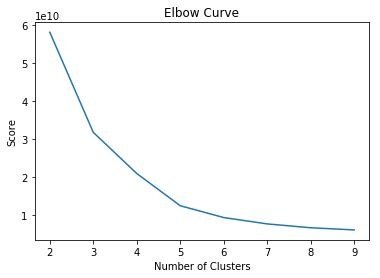

In [5]:
%matplotlib inline
pyh.plot_elbow(dfML.select('features'))

### Do a cluster analysis with the suggested number of clusters.

In [6]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
CLUSTERS = 8
kmeans = KMeans().setK(CLUSTERS).setSeed(1)
model = kmeans.fit(dfML.select('features'))
predictions = model.transform(dfML)
centroids = model.clusterCenters()
print(centroids)
display(predictions)

[array([2.15110976e-01, 1.90483430e-01, 1.62967467e-01, 1.28002432e-01,
       9.28853755e-02, 5.22955306e-02, 3.49650350e-02, 3.26847066e-02,
       2.91882031e-02, 3.16205534e-02, 2.44755245e-02, 5.51231377e-01,
       3.23958650e-01, 5.14898145e-01, 3.05868045e-01, 1.38035877e-01,
       4.93615081e-01, 8.40377014e-01, 4.17756157e-01, 2.72727273e-01,
       1.16296747e-01, 7.34265734e-02, 3.61812101e-02, 2.47795683e-02,
       1.29218607e-02, 1.26178170e-02, 6.38491943e-03, 4.10459106e-03,
       3.80054728e-03, 3.64852539e-03, 3.34448161e-03, 1.67224080e-03,
       9.12131347e-04, 1.67224080e-03, 1.06415324e-03, 9.12131347e-04,
       7.60109456e-04, 4.56065673e-04, 7.60109456e-04, 6.08087565e-04,
       3.04043782e-04, 4.56065673e-04, 4.56065673e-04, 4.56065673e-04,
       4.56065673e-04, 3.04043782e-04, 1.52021891e-04, 1.52021891e-04,
       0.00000000e+00, 1.52021891e-04, 1.52021891e-04, 1.52021891e-04,
       0.00000000e+00, 5.81635756e-01, 3.99933110e+01, 2.10630435e+02,
     

,features,prediction
0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
1,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
3,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",3
4,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
5,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
7,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0
8,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
9,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",6


### See if you can predict someone's age from the dataset.
suggested numeric features: 'balance','duration','pdays','previous'
categorical features: 'job','marital','education','housing',
'loan','campaign','deposit'
target: 'age'

In [7]:
# import importlib
# importlib.reload(pyh)

numeric_features = ['balance','duration','pdays','previous']
categorical_features = ['job','marital','education','housing','loan','campaign','deposit']
target_label = 'age'

dfML = pyh.MakeMLDataFrame(dfRaw, categorical_features, numeric_features, target_label, False)
display(dfML)
dfML.printSchema()


--->  <class 'pyspark.sql.column.Column'> ['balance', 'duration', 'pdays', 'previous', 'age', 'job_Vector', 'marital_Vector', 'education_Vector', 'housing_Vector', 'loan_Vector', 'campaign_Vector', 'deposit_Vector'] [Row(balance=2343, duration=1042, pdays=-1, previous=0, age=59, job_Vector=SparseVector(11, {3: 1.0}), marital_Vector=SparseVector(2, {0: 1.0}), education_Vector=SparseVector(3, {0: 1.0}), housing_Vector=SparseVector(1, {}), loan_Vector=SparseVector(1, {0: 1.0}), campaign_Vector=SparseVector(35, {0: 1.0}), deposit_Vector=SparseVector(1, {}))]


,features,target
0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59
1,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56
2,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41
3,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",55
4,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",54
5,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",42
6,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56
7,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",60
8,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",37
9,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",28


root
 |-- features: vector (nullable = true)
 |-- target: integer (nullable = true)



### Split the dataset.

In [8]:
train, test = dfML.randomSplit([.7,.3], seed = 1000)
print (f'Training set row count {train.count()}')
print (f'Testing set row count {test.count()}')


Training set row count 7760
Testing set row count 3402


### Try linear regression.

In [9]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='target', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(train)
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

print("Root Mean Squared Error: {}\nR Squared (R2) {}".format(lrModel.summary.rootMeanSquaredError, lrModel.summary.r2))


Coefficients: [0.0,-1.242892846751979,-0.03192800128048507,0.0,-0.916131353800883,20.140050686015524,0.0,-8.187021149391779,0.0,-0.0,2.526939562951192,0.0,-8.43725618309754,-0.5679299233487966,-0.9825358038357017,2.622941493781913,2.1702251482026704,0.10557351481776876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00018942140341098783,0.0,0.00020302079384269692,0.020713619370758447]
Intercept: 41.6952032324027
Root Mean Squared Error: 8.39328745769199
R Squared (R2) 0.49846716893869447


### See how well it did some predictions.

In [10]:
lrPredictions = lrModel.transform(test)
display(lrPredictions.select("prediction","target","features"), 30)
from pyspark.ml.evaluation import RegressionEvaluator
lrEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="target",metricName="r2")
testResult = lrModel.evaluate(test)
print("Root Mean Squared Error on Test set: {}".format(testResult.rootMeanSquaredError))


,prediction,target,features
0,43.604413,31,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,43.912981,53,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,44.455863,46,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,44.759505,57,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,43.997943,50,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,43.402869,57,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,43.472765,33,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,43.509892,36,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,43.795161,27,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,43.967534,39,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Root Mean Squared Error on Test set: 8.500420840162077
